In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue May 31 21:00:54 2022

@author: TUF-PC8
"""
# https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib.backends.backend_pdf import PdfPages
import datetime

#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array

from tensorflow.keras.utils import load_img 
from tensorflow.keras.utils import img_to_array
from PIL import Image

def get_num_pixels(filepath):
    width, height = Image.open(filepath).size
    return (width, height)

c:\Users\delat\miniconda3\envs\MLenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
(1, 224, 224, 3)
1/1 [==============================] - 0s 80ms/step


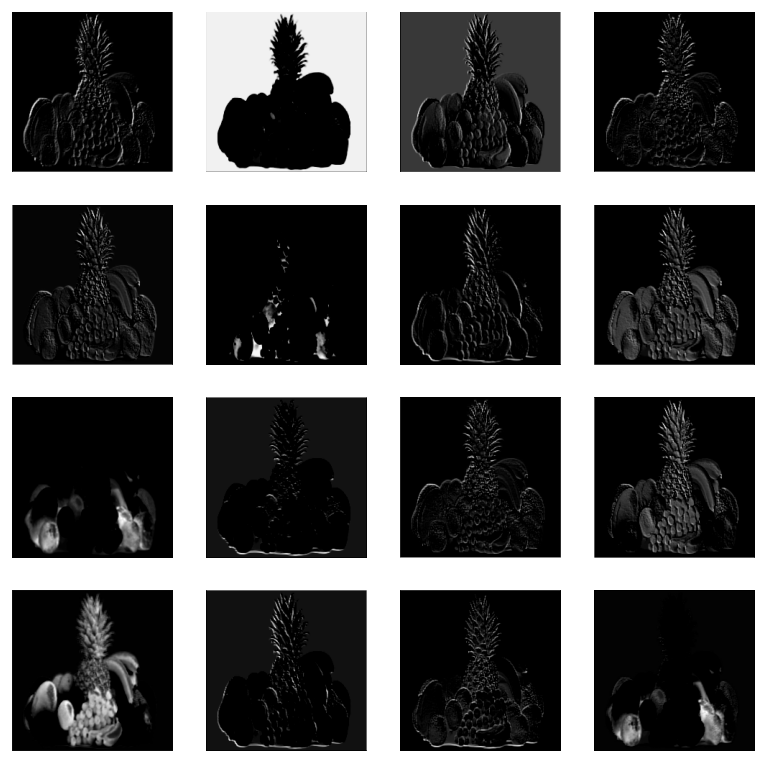

(1, 224, 224, 64)

In [13]:
# load the model
model = VGG16()

# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

# load the image with the required shape
path = 'frutas.jpg'
img = load_img(path, target_size=(224,224,3))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
print(img.shape)

## prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 4
ix = 1

fig, ax = pyplot.subplots(nrows = 4, ncols = 4, figsize = (8, 8), dpi = 120)
for i in range(square):
	for j in range(square):
		ax[i][j].imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ax[i][j].axis('off')
		ix += 1
pyplot.show()
feature_maps.shape
